<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 9

# Question 1

In this question, you need to use CNN to make a classification of the below data.

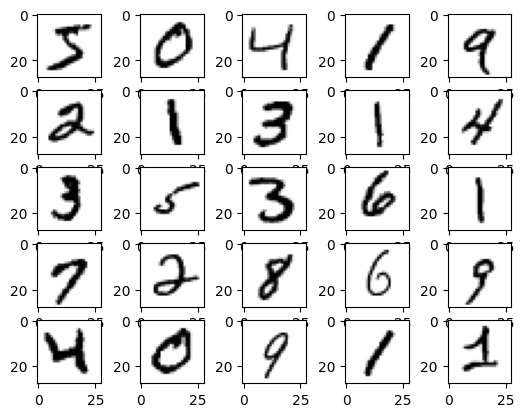

(28, 28, 1) 10
Train: X=(600, 28, 28, 1), y=(600,)
Test: X=(100, 28, 28, 1), y=(100,)


In [1]:

# example of a cnn for image classification
import numpy as np
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.callbacks import History  # Import History callback

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
x_train,y_train,x_test,y_test=255-x_train, y_train, 255- x_test, y_test

# plot first few images
for i in range(25):
	# define subplot
	plt.subplot(5, 5, i+1)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train=x_train[:600]
y_train=y_train[:600]
x_test=x_test[:100]
y_test=y_test[:100]

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Make a CNN model using the input data X to classify the data y such that the accuracy value of testing case is larger than 85%. The number of epochs is fixed as 10 and batch_size is fixed as 128.

Save your model as `model_q1.h5`.

## Trial 1/2: tuning the model by trial-and-error method

In [2]:
## answer 1
# normalize pixel values
print(x_test[0].shape)

print('See whether the image is normalized:')
print('Max value:', x_test[0].max())
print('Min value:', x_test[0].min())

(28, 28, 1)
See whether the image is normalized:
Max value: 1.0
Min value: 0.0


In [3]:
# define model
from tensorflow.keras.layers import BatchNormalization

"""
# Start by creating a Sequential model. This is the simplest kind of 
# neural network in Keras, which is a linear stack of layers. 
"""
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', 
                 kernel_initializer='he_uniform', input_shape=in_shape))
model.add(Conv2D(64, (3,3), activation='relu', 
                 kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
# model.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(n_classes, activation='softmax'))

# define loss and optimizer
# 'adam': SGD variations
# 'sparse_categorical_crossentropy': for multi-class classification
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
# fit the model
# Because it is SGD, we need to specify batch_size
from keras.callbacks import History  # Import History callback
history = History()

model.fit(x_train, y_train, validation_split=0.2, 
          epochs=10, batch_size=128, verbose=0, callbacks=[history])

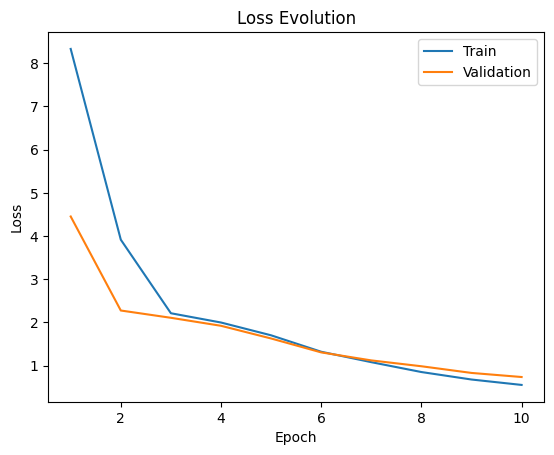

4/4 [==============================] - 0s 7ms/step - loss: 0.6098 - accuracy: 0.8500
Evaluating model accuracy with the set of test data:
[test loss, test accuracy]: [0.6097738742828369, 0.8500000238418579]


In [4]:
# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']

# We need validation data to evaluate the model
val_loss_values = history.history['val_loss']
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

# evaluate the model
eval_result = model.evaluate(x_test, y_test)
print("Evaluating model accuracy with the set of test data:")
print("[test loss, test accuracy]:", eval_result)

## Evaluate the model with confustion matrix

In [5]:
from sklearn.metrics import confusion_matrix 
import numpy as np

# y_test as a collection of truth labels 
# y_pred as a collection of predicted labels

# Predict probabilities for x_test
y_pred_prob = model.predict(asarray(x_test))
# Convert probabilities into class labels
y_pred = np.argmax(y_pred_prob, axis=1)

cm_lin = confusion_matrix(y_test, y_pred)
print(cm_lin)

4/4 [==============================] - 0s 5ms/step
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 1  0  0  0 12  0  0  0  0  1]
 [ 0  0  0  1  1  5  0  0  0  0]
 [ 1  1  2  0  0  0  6  0  0  0]
 [ 0  1  0  0  0  0  0 13  0  1]
 [ 0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  1  9]]


## Summarize the model we have got:

In [6]:
# summarize the model
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

## Trial 2/2: Using Keras tuner to find optimal neural netowrk hyperparameter

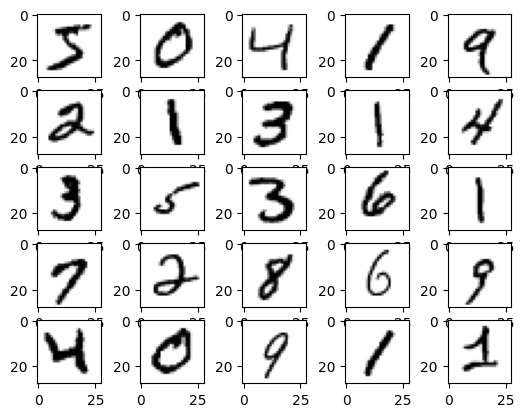

(28, 28, 1) 10
Train: X=(600, 28, 28, 1), y=(600,)
Test: X=(100, 28, 28, 1), y=(100,)


In [7]:

# example of a cnn for image classification
import numpy as np
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.callbacks import History  # Import History callback

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
x_train,y_train,x_test,y_test=255-x_train, y_train, 255- x_test, y_test

# plot first few images
for i in range(25):
	# define subplot
	plt.subplot(5, 5, i+1)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train=x_train[:600]
y_train=y_train[:600]
x_test=x_test[:100]
y_test=y_test[:100]

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Sure, here is the complete explanation for the hyperparameters varibles used in Keras tuner: 

# Write out a list of hyperparameter variables:

## Conv2D layer:
1. Dimension size (min / max): The number of output filters in the convolution. Essentially, it defines the number of "feature maps" produced by the convolution.
2. steps: This represents the increment size for the number of filters. E.g. if min_value=32, max_value=128, and step=16, then the possible values for the number of filters are 32, 48, 64, ..., 128. The tuner will search these values for the optimal one.
3. Kernel size (3 or 5): This is the size of the 2D convolution window to be applied on the input. Here, we are considering two possible sizes, 3 (resulting in a 3x3 filter) and 5 (resulting in a 5x5 filter).
4. Activation function: It is a function that is used to map the output of the neuron to different ranges. Here 'relu' (Rectified Linear Unit) activation function is used which is a non-linear function and helps the network learn complex patterns.
5. Kernel initializer: This defines the procedure for setting the initial random weights of Keras layers. 'he_uniform' is used which draws samples from a uniform distribution.

## MaxPool layer:
1. Pool layer size: Pooling is a down-sampling operation that is typically applied after a convolution layer. Here, a 2D max pooling operation is applied with pool size of (2, 2). This means the max value over a 2x2 sliding window is taken.

## Dense layer:
1. Dimension size (min / max): This is the number of output units of the layer. It's similar to the Conv2D layer's dimension size.
2. Steps: Similar to the Conv2D layer, this is the increment size for the number of output units.
3. Activation function: Here, 'relu' is used as the activation function.
4. kernel_regularizer: L1 and L2 are easily lead to overfitting so we choose min and max as 0 and 0. 

## Dropout layer:
1. dropout_rate: Dropout is a regularization technique that helps to avoid overfitting in neural networks. During training, some number of layer outputs are randomly set to 0, which helps to prevent overfitting. The 'dropout_rate' is the fraction of the input units to drop, which can vary between 0.0 and 0.5 in this case.

## Learning rate: 
Learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. In this script, three possible learning rates are considered: 0.01, 0.001, 0.0001.

## tuner = RandomSearch() parameters: 
Sure, here's the explanation for those hyperparameters:

1. max_trials: This is the maximum number of hyperparameter combinations to try. The search space for hyperparameters can be very large, so this parameter limits the number of different sets of hyperparameters to attempt. In this script, `max_trials=5` means that the tuner will try 5 different sets of hyperparameters.

2. executions_per_trial: This is the number of times to run each model with a given set of hyperparameters. Running multiple executions can help to smooth out variability in the model's performance due to the stochastic nature of training deep learning models. The performance for a given set of hyperparameters is averaged over its multiple executions. In this script, `executions_per_trial=3` means that the tuner will train and evaluate each model 3 times and average the results. This helps to get more reliable results and reduce the chance of selecting hyperparameters that work well by chance on a single run.

## tuner.get_best_hyperparameters:
num_trials: The number of hyperparameter combinations that were tried by the tuner. Here we're retrieving the hyperparameters for the best trial only, hence `num_trials=1`. The best trial is determined by the tuner based on the 'val_accuracy' objective.


In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
                            activation='relu',
                            kernel_initializer='he_uniform',
                            input_shape=in_shape))
    model.add(layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
                            kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
                            activation='relu',
                            kernel_initializer='he_uniform'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
                           activation='relu', 
                           kernel_initializer='he_uniform',
                           kernel_regularizer=regularizers.l1_l2(l1=hp.Float('l1_value', min_value=0.0, max_value=0.0, step=0.01),
                                                                 l2=hp.Float('l2_value', min_value=0.0, max_value=0.0, step=0.01))
                           ))
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(layers.Dense(n_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy', # validation accuaracy, model metrics is 'accuracy'. 
    max_trials=5,
    executions_per_trial=3,
    directory='Lab9-Tuner-logs',
    project_name='Lab9-Q1')

tuner.search_space_summary()

tuner.search(x_train, y_train, epochs=10, 
             validation_split=0.2,
             batch_size=128,)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.574999988079071

Best val_accuracy So Far: 0.8111111124356588
Total elapsed time: 00h 01m 09s


## Explore tuner

In [9]:
for param_name in best_hps.values:
    print(f'{param_name}: {best_hps.get(param_name)}')


conv_1_filter: 96
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 80
l1_value: 0.0
l2_value: 0.0
dropout_rate: 0.30000000000000004
learning_rate: 0.001


In [10]:
model = tuner.hypermodel.build(best_hps)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 96)        960       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        41520     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 48)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6912)              0         
                                                                 
 dense_2 (Dense)             (None, 80)                553040    
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                      

In [11]:
# this line keras would build the model directly. 
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


15/15 [==============================] - 1s 42ms/step - loss: 2.9082 - accuracy: 0.1979 - val_loss: 2.0108 - val_accuracy: 0.4917
Epoch 2/10
15/15 [==============================] - 1s 36ms/step - loss: 1.4484 - accuracy: 0.5854 - val_loss: 1.0740 - val_accuracy: 0.7250
Epoch 3/10
15/15 [==============================] - 1s 39ms/step - loss: 0.7149 - accuracy: 0.7937 - val_loss: 0.8165 - val_accuracy: 0.7250
Epoch 4/10
15/15 [==============================] - 1s 37ms/step - loss: 0.4598 - accuracy: 0.8562 - val_loss: 0.7262 - val_accuracy: 0.7750
Epoch 5/10
15/15 [==============================] - 1s 37ms/step - loss: 0.2856 - accuracy: 0.9000 - val_loss: 0.5767 - val_accuracy: 0.8000
Epoch 6/10
15/15 [==============================] - 1s 39ms/step - loss: 0.2115 - accuracy: 0.9396 - val_loss: 0.5631 - val_accuracy: 0.8167
Epoch 7/10
15/15 [==============================] - 1s 37ms/step - loss: 0.1524 - accuracy: 0.9583 - val_loss: 0.5381 - val_accuracy: 0.8333
Epoch 8/10
15/15 [======

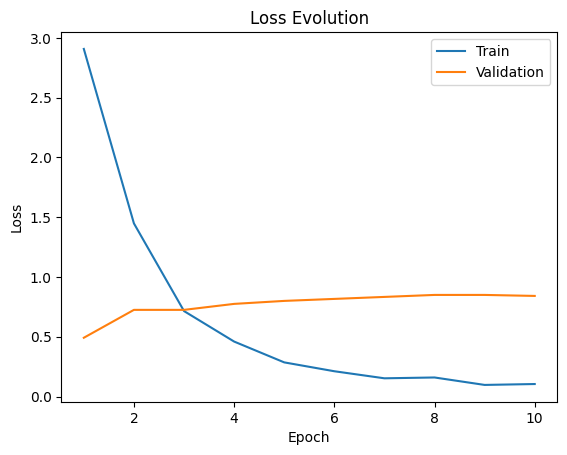

4/4 [==============================] - 0s 8ms/step - loss: 0.3739 - accuracy: 0.8800
Evaluating model accuracy with the set of test data:
[test loss, test accuracy]: [0.37388649582862854, 0.8799999952316284]


In [12]:
loss_values = history.history['loss']
val_loss_values = history.history['val_accuracy']

"""  
Hypermodel (reinstantiate model with better epoch number)

# Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel = tuner.hypermodel.build(best_hps)
# Retrain the model
history = hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)

loss_values = history.history['loss']
val_loss_values = history.history['val_accuracy']

"""

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

eval_result = model.evaluate(x_test, y_test)
print("Evaluating model accuracy with the set of test data:")
print("[test loss, test accuracy]:", eval_result)

## Summarize the model we have got:

In [13]:
# summarize the model
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 96)        960       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        41520     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 48)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6912)              0         
                                                                 
 dense_2 (Dense)             (None, 80)                553040    
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                      

## Save model

In [14]:
model.save('model_q1.h5')

c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Conclusion: 

1. Model from manual-tuning:

```
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               921700    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
=================================================================
Total params: 941526 (3.59 MB)
Trainable params: 941526 (3.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

2. Model from Keras tuner:
```
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_10 (Conv2D)          (None, 26, 26, 96)        960       
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 32)        76832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3872)              0         
                                                                 
 dense_10 (Dense)            (None, 80)                309840    
                                                                 
 dropout_5 (Dropout)         (None, 80)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                810       
                                                                 
=================================================================
Total params: 388442 (1.48 MB)
Trainable params: 388442 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

Keras Tuner - second attempt:
```
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_2 (Conv2D)           (None, 26, 26, 112)       1120      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        64576     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
=================================================================
Total params: 1246762 (4.76 MB)
Trainable params: 1246762 (4.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

## Results

(1) Having less test loss, higher accuracy: 
- Keras Tuner (first attempt): [test loss, test accuracy]: [0.32267192006111145, 0.8899999856948853] 
- Keras Tuner (second attempt): [test loss, test accuracy]: [0.4078054130077362, 0.9100000262260437]
- Manual Tuning: [test loss, test accuracy]: [0.5031326413154602, 0.8399999737739563]

(2) Having less trainable parameters: 
- Keras Tuner (first attempt): 388442 params
- Keras Tuner (second attempt): 1246762 params
- Manual Tuning: 941526 params 

## Conclusion

While Keras Tuner can produce an accurate model, it does not grant us a simpler model . 

---

## Question 2


In this question, we create an LSTM model to predict on 9 stocks.

Enter

In [15]:
from numpy import sqrt
from numpy import asarray
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import pandas as pd

def split_data(data, n_steps):
	X, y = list(), list()
	for i in range(data.shape[0]):
		end_ix = i + n_steps
		if end_ix > data.shape[0]-1:
			break
		seq_x, seq_y = data[i:end_ix,:], data[end_ix,:]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

df = pd.read_csv('stock_prices.csv')
df = df.iloc[:,1:].copy()
values = df.values.astype('float32')


In [16]:
print(df)
print(values)
print(df.shape)
print(values.shape)

          AAPL        AMZN       BRK-B       GOOGL         JNJ         JPM  \
0   172.990005  115.000000  319.019989  123.480003  154.410004  135.669998   
1   175.429993  120.110001  320.600006  124.610001  154.350006  136.940002   
2   177.300003  121.660004  322.190002  123.669998  154.369995  137.460007   
3   177.250000  120.580002  321.079987  122.870003  155.059998  135.710007   
4   180.089996  122.769997  323.119995  123.720001  154.539993  137.580002   
..         ...         ...         ...         ...         ...         ...   
95  179.800003  131.830002  348.429993  140.550003  156.179993  146.149994   
96  180.710007  132.330002  345.660004  138.970001  156.330002  145.809998   
97  178.850006  129.789993  345.089996  137.360001  156.850006  148.000000   
98  178.720001  132.550003  346.230011  139.100006  157.529999  147.850006   
99  177.149994  131.470001  345.390015  139.720001  156.089996  147.529999   

          MSFT        TSLA           V  
0   325.920013  184.47

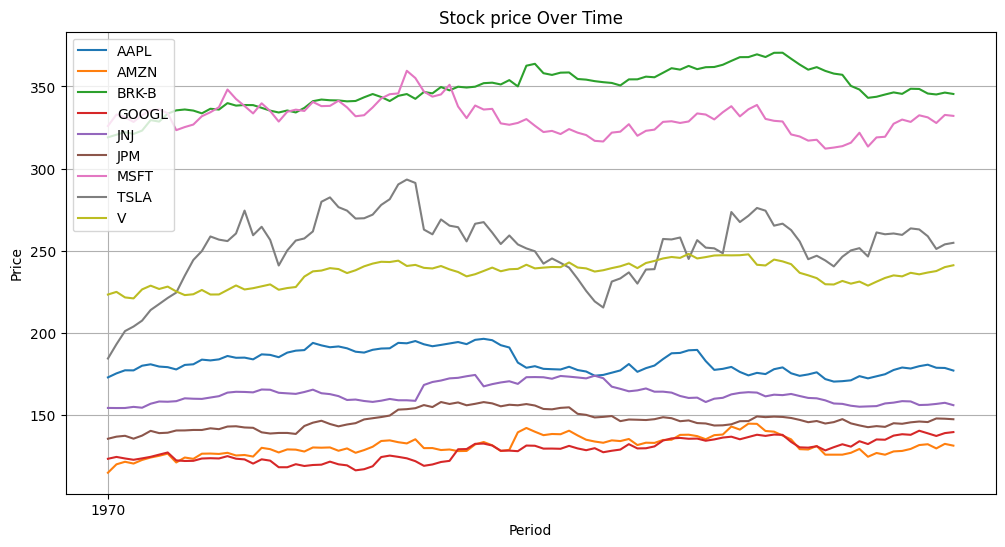

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to datetime for better plotting
df.index = pd.to_datetime(df.index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.values, label=df.columns,  linestyle='-')
plt.title('Stock price Over Time')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:

values = df.values.astype('float32')
# specify the context window size
n_steps = 5
# split into samples
X, y = split_data(values, n_steps)


# Show some examples of X and y:
print(f"The 10th element of X: {X[10]}")
print(f"The 10th element of y: {y[10]}")
print("We can see that each X is matching to the next position in the chart.")


print(f"X: {X}")
print(f"There are {len(X)} element in X")

print(f"y: {y}")
print(f"There are {len(y)} element in y")




The 10th element of X: [[180.96 123.43 335.29 122.23 160.01 141.01 326.79 244.4  223.56]
 [183.79 126.57 333.6  123.64 159.9  141.   331.85 249.83 226.17]
 [183.31 126.66 336.39 123.83 160.74 142.02 334.29 258.71 223.4 ]
 [183.95 126.42 335.9  123.67 161.56 141.49 337.34 256.79 223.44]
 [186.01 127.11 339.82 125.09 163.73 143.09 348.1  255.9  226.17]]
The 10th element of y: [184.92 125.49 338.31 123.53 164.23 143.26 342.33 260.54 228.91]
We can see that each X is matching to the next position in the chart.
X: [[[172.99 115.   319.02 ... 325.92 184.47 223.38]
  [175.43 120.11 320.6  ... 332.89 193.17 225.01]
  [177.3  121.66 322.19 ... 331.21 201.16 221.64]
  [177.25 120.58 321.08 ... 328.39 203.93 221.03]
  [180.09 122.77 323.12 ... 332.58 207.52 226.5 ]]

 [[175.43 120.11 320.6  ... 332.89 193.17 225.01]
  [177.3  121.66 322.19 ... 331.21 201.16 221.64]
  [177.25 120.58 321.08 ... 328.39 203.93 221.03]
  [180.09 122.77 323.12 ... 332.58 207.52 226.5 ]
  [180.95 124.25 329.48 ... 335.4

The stock prices of 100 trading days are stored in `values`. Use `split_data()` to structure the input so that we use the all stocks of the previous 5 days to predict all stocks of the next 1 day. This should give you 95 datapoints. 

Use the last 10 datapoints as the testing set.

Create an LSTM of no more than 3 layers (excluding the output layer) with no more than 100 units per layer. 

Use the `adam` optimizer and train with `loss="mse"` and measure performance with `mae`.

Train with no more than `300` epochs and achieve MAE less than $10$ on testing set.

Save your model as `model_q2.h5`.

In [19]:
## answer 2

# split into train/test
n_test = 10
# '-n_test' : it means 'last 12'. X[:-n_test] return 91 values. 
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:] 
# because the size of X and y is not equal, so we truncate X and y to make them equal length.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(85, 5, 9) (10, 5, 9) (85, 9) (10, 9)


## RandomSearch() looking for the best hyperparameter of the model

In [20]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
import keras

from tensorflow.keras.layers import Dropout

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units',
                                min_value=2,
                                max_value=100,
                                step=10),
                   activation='relu', 
                   kernel_initializer='he_normal', 
                   input_shape=(X_train.shape[1],X_train.shape[2])))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('dense_units_' + str(i),
                                    min_value=2,
                                    max_value=100,
                                    step=10), 
                        activation='relu', 
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l1_l2(
                            l1=hp.Float('l1_reg', min_value=0.0, max_value=0.1, step=0.01),
                            l2=hp.Float('l2_reg', min_value=0.0, max_value=0.1, step=0.01))))
        if hp.Choice('batch_normalization', values=[0, 1]):
            model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
        
    model.add(Dense(9))
    model.compile(optimizer=keras.optimizers.Adam(
        hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,  # how many model configurations would you like to test?
    executions_per_trial=5,  # how many trials per variation? (same model could have different performance)
    directory='Lab9-Tuner-logs',
    project_name='Lab9-Q2')

tuner.search_space_summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x=X_train,
             y=y_train,
             epochs=300,
             validation_data=(X_test, y_test),
             callbacks=[early_stop])

# After the search, get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]

Reloading Tuner from Lab9-Tuner-logs\Lab9-Q2\tuner0.json
Search space summary
Default search space size: 10
lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
dense_units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
l1_reg (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.0, 'step': 0.01, 'sampling': 'linear'}
l2_reg (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.0, 'step': 0.01, 'sampling': 'linear'}
batch_normalization (Choice)
{'default': 0, 'conditions': [], 'values': [0, 1], 'ordered': True}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], '

In [21]:
print("optimal hyperparameters: ")

# Print the best hyperparameters
for param_name in best_hps.values:
    print(f'{param_name}: {best_hps.get(param_name)}')



optimal hyperparameters: 
lstm_units: 72
num_layers: 3
dense_units_0: 12
l1_reg: 0.0
l2_reg: 0.0
batch_normalization: 0
dropout_rate: 0.0
learning_rate: 0.004263863527879282
dense_units_1: 82
dense_units_2: 92


In [22]:
# this line keras would build the model directly. 
model = tuner.hypermodel.build(best_hps)

# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, 
                           epochs=300, batch_size=32, 
          verbose=2, 
          validation_data=(X_test, y_test),
          callbacks=[es])

Epoch 1/300


3/3 - 1s - loss: 137.8346 - mean_absolute_error: 137.8346 - val_loss: 44.7469 - val_mean_absolute_error: 44.7469 - 1s/epoch - 349ms/step
Epoch 2/300
3/3 - 0s - loss: 39.8837 - mean_absolute_error: 39.8837 - val_loss: 45.9921 - val_mean_absolute_error: 45.9921 - 30ms/epoch - 10ms/step
Epoch 3/300
3/3 - 0s - loss: 42.5434 - mean_absolute_error: 42.5434 - val_loss: 26.7536 - val_mean_absolute_error: 26.7536 - 32ms/epoch - 11ms/step
Epoch 4/300
3/3 - 0s - loss: 22.9347 - mean_absolute_error: 22.9347 - val_loss: 19.4919 - val_mean_absolute_error: 19.4919 - 32ms/epoch - 11ms/step
Epoch 5/300
3/3 - 0s - loss: 22.8240 - mean_absolute_error: 22.8240 - val_loss: 18.3857 - val_mean_absolute_error: 18.3857 - 29ms/epoch - 10ms/step
Epoch 6/300
3/3 - 0s - loss: 20.2024 - mean_absolute_error: 20.2024 - val_loss: 15.2752 - val_mean_absolute_error: 15.2752 - 28ms/epoch - 9ms/step
Epoch 7/300
3/3 - 0s - loss: 14.5061 - mean_absolute_error: 14.5061 - val_loss: 16.4082 - val_mean_absolute_error: 16.4082 -

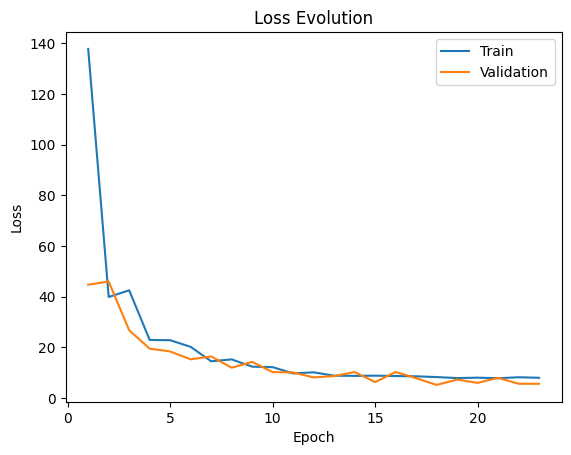

1/1 [==============================] - 0s 25ms/step - loss: 5.6313 - mean_absolute_error: 5.6313
[MSE, MAE]: [5.631260871887207, 5.631260871887207]


In [23]:
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()


eval_result = model.evaluate(X_test, y_test)
print("[MSE, MAE]:", eval_result)

In [24]:
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
yhat = model.predict(X_test)
print(yhat)


MSE: 5.631, RMSE: 2.373, MAE: 5.631
1/1 [==============================] - 0s 94ms/step
[[180.20985  131.40515  338.1984   121.998085 163.41377  144.62714
  324.73618  255.00139  232.26733 ]
 [183.40434  133.14537  342.7691   122.27537  165.40155  146.27922
  331.58945  260.74173  236.11264 ]
 [183.12436  133.0031   342.13138  121.994156 165.1096   145.99428
  331.20605  260.48566  235.81622 ]
 [184.5256   134.46983  345.39383  123.8769   166.84091  147.54353
  333.30228  262.00073  237.88742 ]
 [184.8113   134.97948  345.82355  124.11104  167.13919  147.74173
  334.00986  262.63666  238.50882 ]
 [185.82645  135.29463  347.8382   124.69611  167.98363  148.57622
  335.60376  263.78772  239.46526 ]
 [186.72879  136.2573   350.14487  126.14571  169.20906  149.69846
  336.7736   264.5598   240.78514 ]
 [185.62119  135.8718   348.9494   126.594826 168.78587  149.381
  334.11588  262.2592   239.57103 ]
 [183.94212  134.81606  346.28067  126.080154 167.56152  148.33876
  330.70917  259.45776 

## Summarize the model we have got:

In [25]:
# summarize the model
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 72)                23616     
                                                                 
 dense_4 (Dense)             (None, 12)                876       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_5 (Dense)             (None, 82)                1066      
                                                                 
 dropout_3 (Dropout)         (None, 82)                0         
                                                                 
 dense_6 (Dense)             (None, 92)                7636      
                                                                 
 dropout_4 (Dropout)         (None, 92)               

## Predict one next day

In [26]:
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
yhat = model.predict(X_test)
print(yhat)


MSE: 5.631, RMSE: 2.373, MAE: 5.631
1/1 [==============================] - 0s 23ms/step
[[180.20985  131.40515  338.1984   121.998085 163.41377  144.62714
  324.73618  255.00139  232.26733 ]
 [183.40434  133.14537  342.7691   122.27537  165.40155  146.27922
  331.58945  260.74173  236.11264 ]
 [183.12436  133.0031   342.13138  121.994156 165.1096   145.99428
  331.20605  260.48566  235.81622 ]
 [184.5256   134.46983  345.39383  123.8769   166.84091  147.54353
  333.30228  262.00073  237.88742 ]
 [184.8113   134.97948  345.82355  124.11104  167.13919  147.74173
  334.00986  262.63666  238.50882 ]
 [185.82645  135.29463  347.8382   124.69611  167.98363  148.57622
  335.60376  263.78772  239.46526 ]
 [186.72879  136.2573   350.14487  126.14571  169.20906  149.69846
  336.7736   264.5598   240.78514 ]
 [185.62119  135.8718   348.9494   126.594826 168.78587  149.381
  334.11588  262.2592   239.57103 ]
 [183.94212  134.81606  346.28067  126.080154 167.56152  148.33876
  330.70917  259.45776 

## Predict n next days

In [27]:

yhat2 = model.predict(X_test)
print(yhat2) # total 12 predicted values 

print(yhat2.shape)

1/1 [==============================] - 0s 18ms/step
[[180.20985  131.40515  338.1984   121.998085 163.41377  144.62714
  324.73618  255.00139  232.26733 ]
 [183.40434  133.14537  342.7691   122.27537  165.40155  146.27922
  331.58945  260.74173  236.11264 ]
 [183.12436  133.0031   342.13138  121.994156 165.1096   145.99428
  331.20605  260.48566  235.81622 ]
 [184.5256   134.46983  345.39383  123.8769   166.84091  147.54353
  333.30228  262.00073  237.88742 ]
 [184.8113   134.97948  345.82355  124.11104  167.13919  147.74173
  334.00986  262.63666  238.50882 ]
 [185.82645  135.29463  347.8382   124.69611  167.98363  148.57622
  335.60376  263.78772  239.46526 ]
 [186.72879  136.2573   350.14487  126.14571  169.20906  149.69846
  336.7736   264.5598   240.78514 ]
 [185.62119  135.8718   348.9494   126.594826 168.78587  149.381
  334.11588  262.2592   239.57103 ]
 [183.94212  134.81606  346.28067  126.080154 167.56152  148.33876
  330.70917  259.45776  237.47481 ]
 [184.91698  135.63123 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming y_train and yhat2 are numpy arrays and df is a DataFrame object
print(type(y_train))
print(y_train.shape)
print(df.shape)
print(y_train)

# get the indexes
x_values_train = df.index[-(len(y_train) + len(yhat2)):-len(yhat2)] 
x_values_pred = df.index[-len(yhat2):] 

<class 'numpy.ndarray'>
(85, 9)
(100, 9)
[[180.95 124.25 329.48 124.67 156.97 140.47 335.4  213.97 228.79]
 [179.58 125.3  328.58 126.01 158.32 139.09 335.94 217.61 226.77]
 [179.21 126.61 333.41 127.31 158.18 139.34 333.68 221.31 228.22]
 [177.82 121.23 335.42 122.5  158.52 140.69 323.38 224.57 225.27]
 [180.57 124.25 335.95 122.14 160.26 140.73 325.26 234.86 223.05]
 [180.96 123.43 335.29 122.23 160.01 141.01 326.79 244.4  223.56]
 [183.79 126.57 333.6  123.64 159.9  141.   331.85 249.83 226.17]
 [183.31 126.66 336.39 123.83 160.74 142.02 334.29 258.71 223.4 ]
 [183.95 126.42 335.9  123.67 161.56 141.49 337.34 256.79 223.44]
 [186.01 127.11 339.82 125.09 163.73 143.09 348.1  255.9  226.17]
 [184.92 125.49 338.31 123.53 164.23 143.26 342.33 260.54 228.91]
 [185.01 125.78 338.67 123.1  164.13 142.53 338.05 274.45 226.47]
 [183.96 124.83 338.61 120.55 163.88 142.32 333.56 259.46 227.25]
 [187.   130.15 336.96 123.15 165.62 139.58 339.71 264.61 228.39]
 [186.68 129.33 335.25 122.34 165.4

In [29]:
cols = df.columns  # Generate column names
df_train = pd.DataFrame(y_train, index=x_values_train, columns=cols)
df_pred = pd.DataFrame(yhat2, index=x_values_pred, columns=cols)

print(df_train)
print(df_pred)

                                     AAPL        AMZN       BRK-B       GOOGL  \
1970-01-01 00:00:00.000000005  180.949997  124.250000  329.480011  124.669998   
1970-01-01 00:00:00.000000006  179.580002  125.300003  328.579987  126.010002   
1970-01-01 00:00:00.000000007  179.210007  126.610001  333.410004  127.309998   
1970-01-01 00:00:00.000000008  177.820007  121.230003  335.420013  122.500000   
1970-01-01 00:00:00.000000009  180.570007  124.250000  335.950012  122.139999   
...                                   ...         ...         ...         ...   
1970-01-01 00:00:00.000000085  170.429993  125.980003  357.779999  130.539993   
1970-01-01 00:00:00.000000086  170.690002  125.980003  357.059998  132.309998   
1970-01-01 00:00:00.000000087  171.210007  127.120003  350.299988  130.860001   
1970-01-01 00:00:00.000000088  173.750000  129.460007  348.079987  134.169998   
1970-01-01 00:00:00.000000089  172.399994  124.720001  343.040009  132.429993   

                           

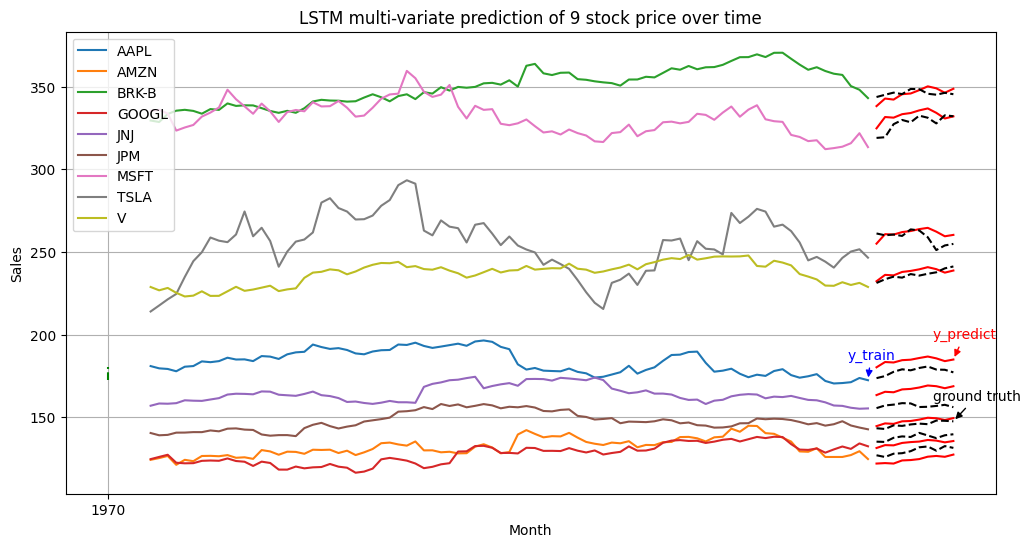

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(df_train.index, df_train.values, label= df.columns,  linestyle='-')
plt.plot(df_pred.index, df_pred.values, color='r', linestyle='-')
plt.plot([df_train.index[-1], df_pred.index[0]], [df_train.values[-1][0], df_pred.values[0][0]], color='g', linestyle='--')
plt.plot(df.index[-len(yhat2):], df.values[-len(yhat2):], color='k',  linestyle='--')

# Check if the values are array and get the first element
y_train_last = df_train.values[-1][0] if isinstance(df_train.values[-1], np.ndarray) else df_train.values[-1]
y_pred_last = df_pred.values[-1][0] if isinstance(df_pred.values[-1], np.ndarray) else df_pred.values[-1]
df_last = df.values[-1][5] if isinstance(df.values[-1], np.ndarray) else df.values[-1]

plt.annotate('y_train', xy=(df_train.index[-1], y_train_last), xytext=(-15,15), 
             textcoords='offset points', color='b', arrowprops=dict(arrowstyle='-|>', color='b'))

plt.annotate('y_predict', xy=(df_pred.index[-1], y_pred_last), xytext=(-15,15), 
             textcoords='offset points', color='r', arrowprops=dict(arrowstyle='-|>', color='r'))

plt.annotate('ground truth', xy=(df.index[-1], df_last), xytext=(-15,15), 
             textcoords='offset points', color='k', arrowprops=dict(arrowstyle='-|>', color='k'))

plt.title('LSTM multi-variate prediction of 9 stock price over time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Save model

In [31]:
model.save('model_q2.h5')

c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
